In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
torch.manual_seed(42)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [ ]:
train_ratio = 0.8
split = int(train_ratio * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 4)
        self.fc3 = nn.Linear(4, 1)
        self.act = nn.ReLU()
        self.out = nn.Sigmoid()

    def forward(self, x):
        a1 = self.act(self.fc1(x))
        a2 = self.act(self.fc2(a1))
        out = self.out(self.fc3(a2))
        return out, [a1, a2]

In [ ]:
model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 2000
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    y_pred, _ = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()

    if (epoch+1) % 400 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f}")

Epoch [400/2000] - Loss: 0.0742
Epoch [800/2000] - Loss: 0.0653
Epoch [1200/2000] - Loss: 0.0587
Epoch [1600/2000] - Loss: 0.0568
Epoch [2000/2000] - Loss: 0.0561


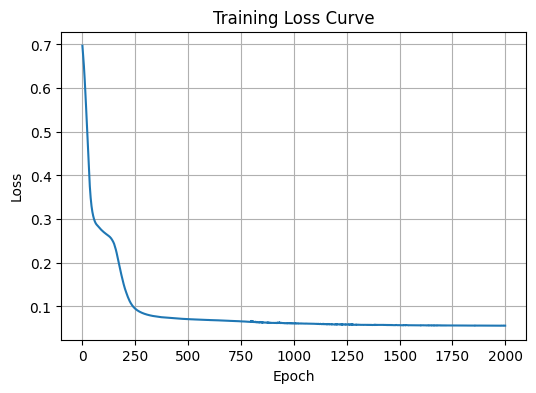

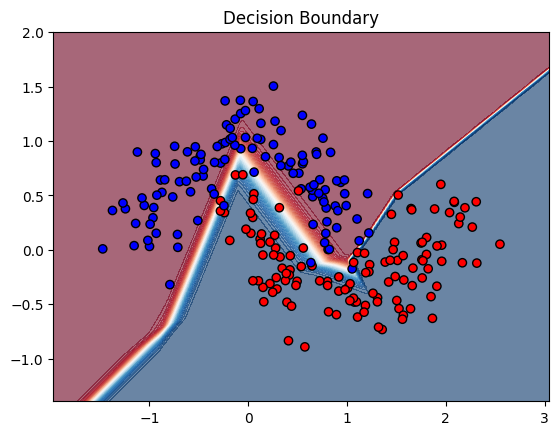

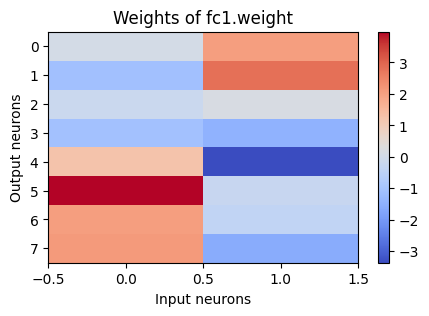

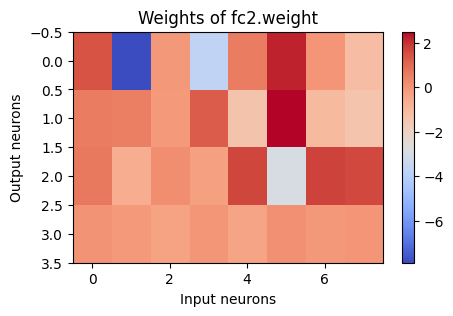

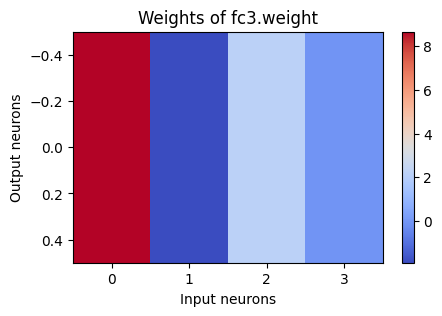

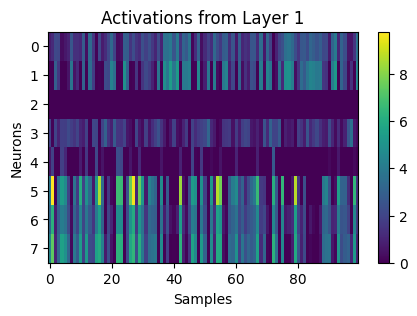

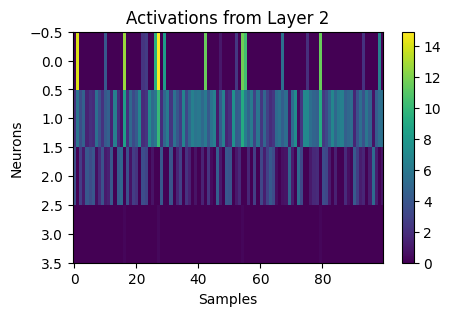


Final Test Accuracy: 95.00%


In [ ]:
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

def plot_decision_boundary(model, X, y):
    model.eval()
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds, _ = model(grid)
    Z = preds.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=50, cmap='RdBu', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, X_train, y_train)

for name, param in model.named_parameters():
    if 'weight' in name:
        plt.figure(figsize=(5,3))
        plt.imshow(param.data.numpy(), cmap='coolwarm', aspect='auto')
        plt.colorbar()
        plt.title(f"Weights of {name}")
        plt.xlabel("Input neurons")
        plt.ylabel("Output neurons")
        plt.show()

model.eval()
with torch.no_grad():
    _, activations = model(X_train)

for i, act in enumerate(activations, 1):
    plt.figure(figsize=(5,3))
    plt.imshow(act[:100].T, cmap='viridis', aspect='auto')
    plt.title(f"Activations from Layer {i}")
    plt.xlabel("Samples")
    plt.ylabel("Neurons")
    plt.colorbar()
    plt.show()

with torch.no_grad():
    y_pred_test, _ = model(X_test)
    preds = (y_pred_test > 0.5).float()
    acc = (preds.eq(y_test).sum() / len(y_test)).item()

print(f"\nFinal Test Accuracy: {acc*100:.2f}%")